In [25]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from scipy.stats import chi2_contingency

In [26]:
heartdata = pd.read_csv('heart_2020_cleaned.csv')
heartdata.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


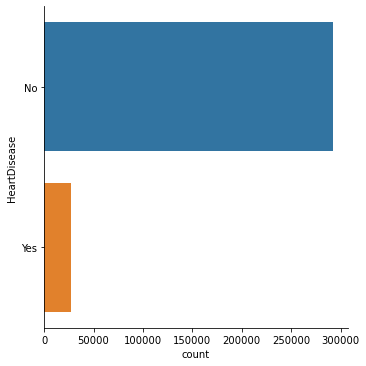

In [27]:
sb.catplot(y = "HeartDisease", data = heartdata, kind = "count")

In [28]:
negative, positive = heartdata['HeartDisease'].value_counts()
print("Ratio of classes is Positive : Negative = ", positive, ":", negative)

Ratio of classes is Positive : Negative =  27373 : 292422


In [29]:
heartdata.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [30]:
for x in heartdata:
    if(heartdata[x].dtype == object):
        print("{0}\t{1}".format(x,heartdata[x].unique()))

HeartDisease	['No' 'Yes']
Smoking	['Yes' 'No']
AlcoholDrinking	['No' 'Yes']
Stroke	['No' 'Yes']
DiffWalking	['No' 'Yes']
Sex	['Female' 'Male']
AgeCategory	['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race	['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic	['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity	['Yes' 'No']
GenHealth	['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Asthma	['Yes' 'No']
KidneyDisease	['No' 'Yes']
SkinCancer	['Yes' 'No']


In [31]:
heartCat = heartdata.loc[:,heartdata.dtypes == object]
heartNum = heartdata.loc[:,heartdata.dtypes != object]

In [32]:
for x in heartCat:
   heartCat[x] = heartCat[x].replace({'No': 0, 'Yes': 1, 'No, borderline diabetes': 2, "Yes (during pregnancy)":3, "Female":0, "Male":1})
heartCat["GenHealth"] = heartCat["GenHealth"].replace({"Poor": 0, "Fair":1, "Good": 2 ,"Very good": 3, "Excellent":4})
heartCat["Race"] = heartCat["Race"].replace({'White': 0, 'Black':1,'Asian':3,'American Indian/Alaskan Native': 4, 'Hispanic':5, 'Other':6})
heartCat["AgeCategory"] = heartCat["AgeCategory"].replace({'80 or older': 0, '75-79': 1, '70-74': 2,  '65-69':3, '60-64':4, '55-59': 5,'50-54': 6, '45-49': 7, '40-44': 8, '35-39': 9,'30-34': 10, '25-29': 11, '18-24': 12})

<ipython-input-32-7c9b8f4ba2e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heartCat[x] = heartCat[x].replace({'No': 0, 'Yes': 1, 'No, borderline diabetes': 2, "Yes (during pregnancy)":3, "Female":0, "Male":1})
<ipython-input-32-7c9b8f4ba2e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heartCat["GenHealth"] = heartCat["GenHealth"].replace({"Poor": 0, "Fair":1, "Good": 2 ,"Very good": 3, "Excellent":4})
<ipython-input-32-7c9b8f4ba2e0>:4: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [33]:
heartNum = pd.concat([heartNum, heartCat["HeartDisease"]], axis=1)

In [34]:
heartCat.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,0,1,0,0,0,0,5,0,1,1,3,1,0,1
1,0,0,0,1,0,0,0,0,0,1,3,0,0,0
2,0,1,0,0,0,1,3,0,1,1,1,1,0,0
3,0,0,0,0,0,0,1,0,0,0,2,0,0,1
4,0,0,0,0,1,0,8,0,0,1,3,0,0,0


In [35]:
heartNum.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease
0,16.60,3.0,30.0,5.0,0
1,20.34,0.0,0.0,7.0,0
2,26.58,20.0,30.0,8.0,0
3,24.21,0.0,0.0,6.0,0
4,23.71,28.0,0.0,8.0,0


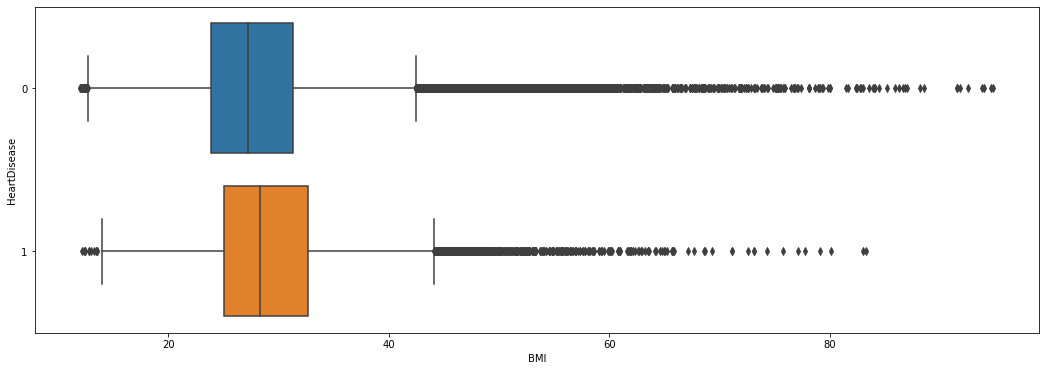

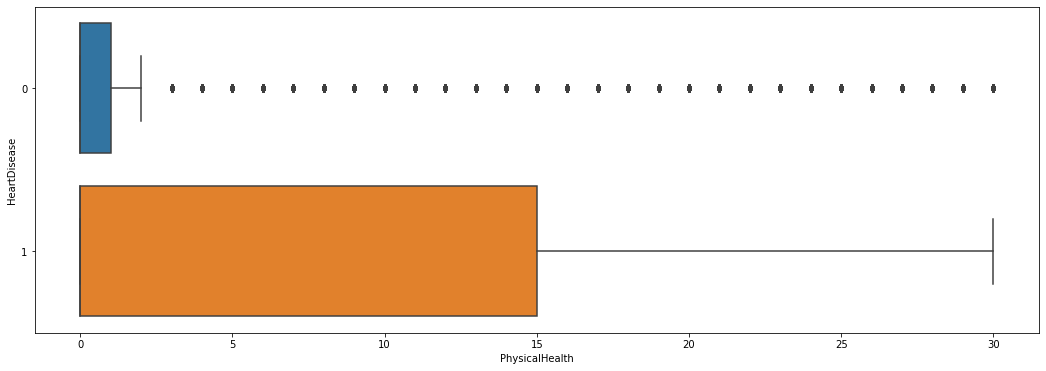

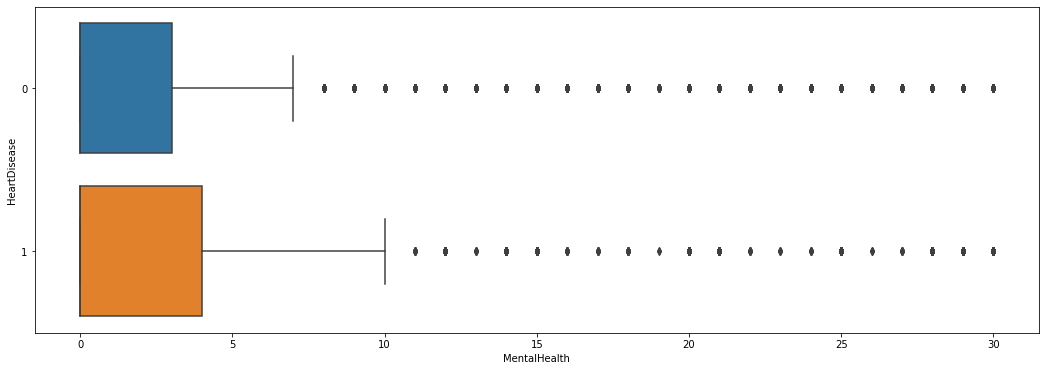

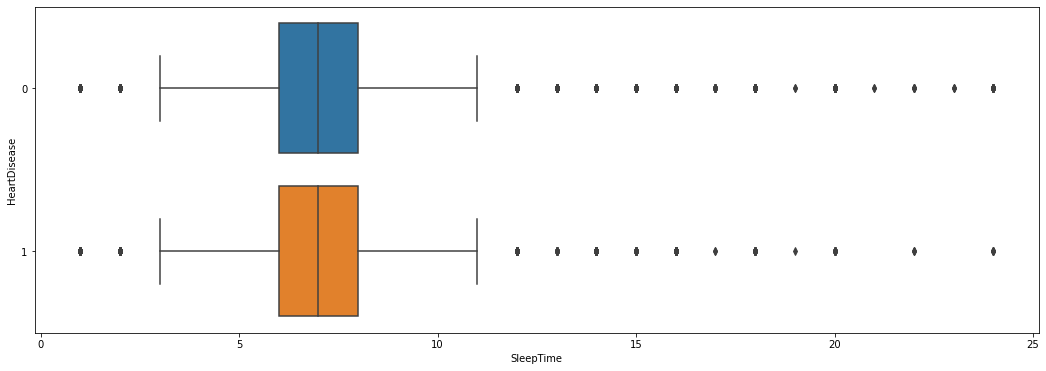

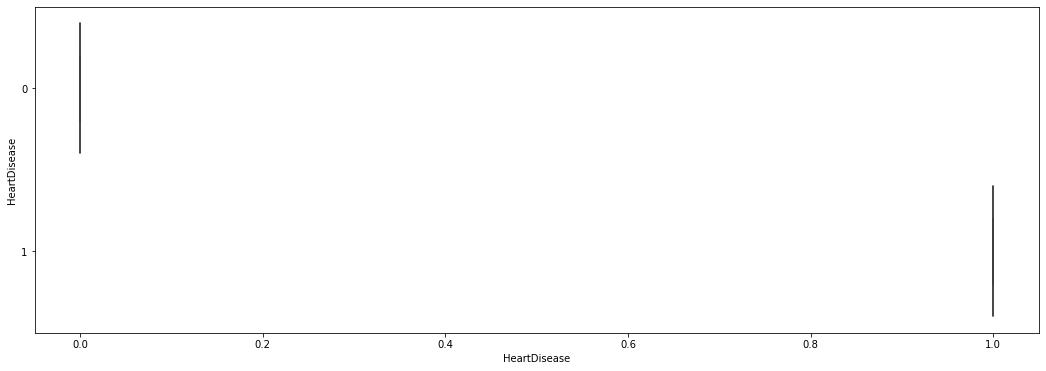

In [36]:
for x in heartNum:
    # Joint Boxplot of Total Train against Legendary Train
    f = plt.figure(figsize=(18, 6))
    sb.boxplot(x = x, y = "HeartDisease", data = heartNum, orient = "h")

In [37]:
def cramers_v(confusion_matrix):
    """Calculate Cramer's V statistic for categorical-categorical association."""
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    phi2 = chi2 / n
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1) ** 2) / (n-1)
    kcorr = k - ((k-1) ** 2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [38]:
for x in heartCat:
    confusion_matrix = pd.crosstab(heartCat['HeartDisease'], heartCat[x])
    # Compute Cramer's V
    cramers_v_score = cramers_v(confusion_matrix)
    print("Cramer's V score of {0}: {1}".format(x,cramers_v_score))

Cramer's V score of HeartDisease: 0.9999800239051646
Cramer's V score of Smoking: 0.10773846087482163
Cramer's V score of AlcoholDrinking: 0.03200879887809506
Cramer's V score of Stroke: 0.19679833564267563
Cramer's V score of DiffWalking: 0.2012344328887237
Cramer's V score of Sex: 0.07000706476622086
Cramer's V score of AgeCategory: 0.2455882284871055
Cramer's V score of Race: 0.05123034767511208
Cramer's V score of Diabetic: 0.18510064230619377
Cramer's V score of PhysicalActivity: 0.10000106559379833
Cramer's V score of GenHealth: 0.2595190954095387
Cramer's V score of Asthma: 0.04139005558272802
Cramer's V score of KidneyDisease: 0.14515688379429212
Cramer's V score of SkinCancer: 0.09328104401839457


The variables with consistently the highest Cramer's V score is AgeCategory, GenHealth and DiffWalking

In [39]:
selheartdata = pd.concat([heartCat[["HeartDisease","GenHealth","AgeCategory","DiffWalking"]],heartNum["PhysicalHealth"]],axis=1)

In [40]:
selheartdata.head()

,HeartDisease,GenHealth,AgeCategory,DiffWalking,PhysicalHealth
0,0,3,5,0,3.0
1,0,3,0,0,0.0
2,0,1,3,0,20.0
3,0,2,1,0,0.0
4,0,3,8,1,28.0


In [41]:
def removeOutlier(cleanData,columnName):
    Q1 = cleanData[columnName].quantile(0.25)
    Q3 = cleanData[columnName].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    # Create arrays of Boolean values indicating the outlier rows
    saleupperout = cleanData[columnName] >= upper
    salelowerout = cleanData[columnName] <= lower

    # Removing the outliers
    cleanData = cleanData[~saleupperout]
    cleanData = cleanData[~salelowerout]
    return cleanData

In [42]:
selheartdata.shape

(319795, 5)

In [43]:
cleaned_selected_heartdata = removeOutlier(selheartdata,"PhysicalHealth")

<ipython-input-41-680ca6aa2b1c>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleanData = cleanData[~salelowerout]


In [44]:
cleaned_selected_heartdata.shape

(265043, 5)

<AxesSubplot:xlabel='PhysicalHealth', ylabel='HeartDisease'>

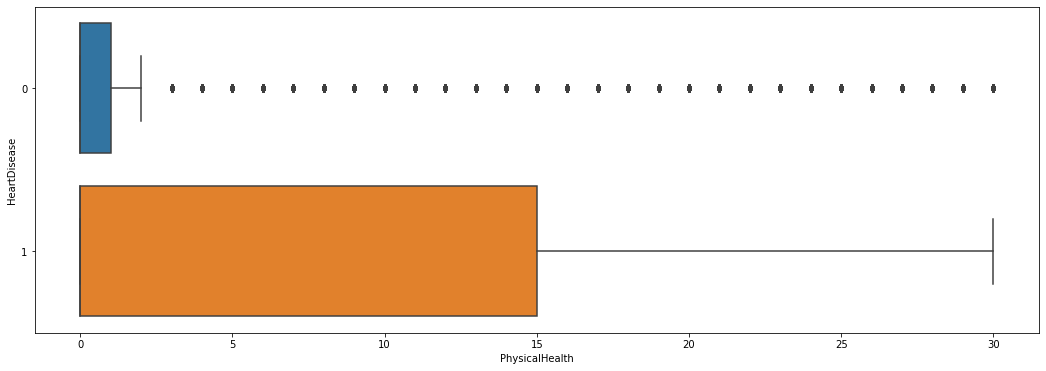

In [45]:
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "PhysicalHealth", y = "HeartDisease", data = heartNum, orient = "h")

In [46]:
cleaned_selected_heartdata.to_csv('selected_heartdata.csv', index=False)

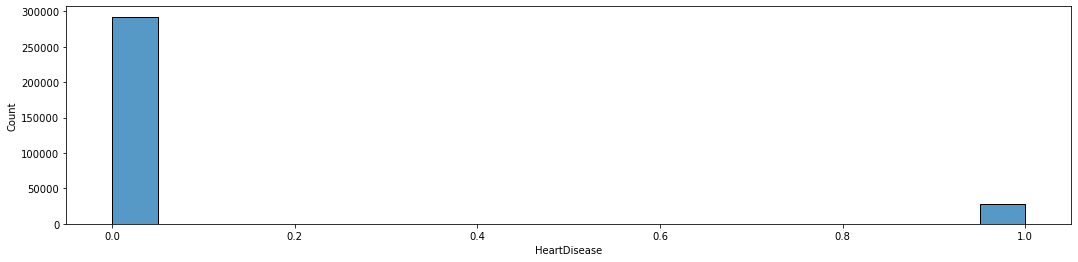

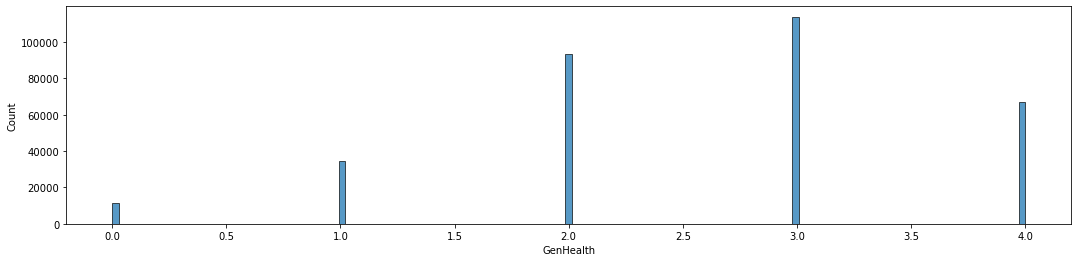

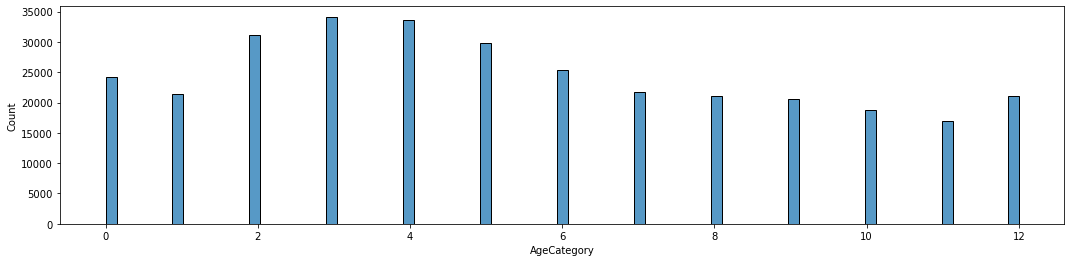

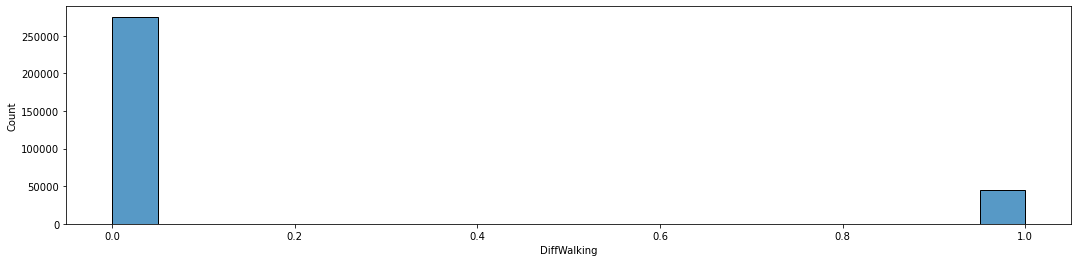

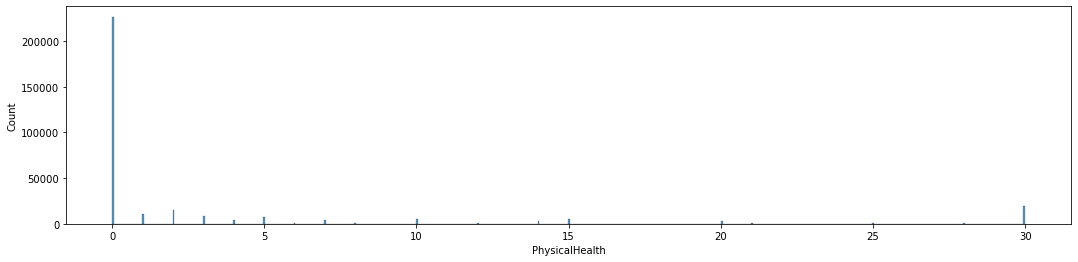

In [47]:
# Amount of the Credit
for x in selheartdata:
    f, axes = plt.subplots(1, 1, figsize=(18, 4))
    sb.histplot(data = selheartdata[x], ax = axes)